<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Top" data-toc-modified-id="Top-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Top</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Nones" data-toc-modified-id="Nones-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Nones</a></span></li><li><span><a href="#Metrics" data-toc-modified-id="Metrics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Metrics</a></span><ul class="toc-item"><li><span><a href="#Resolution-Ratio" data-toc-modified-id="Resolution-Ratio-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Resolution Ratio</a></span></li><li><span><a href="#F1" data-toc-modified-id="F1-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>F1</a></span></li><li><span><a href="#Question-Difficulty" data-toc-modified-id="Question-Difficulty-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Question Difficulty</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#complete-results-tables" data-toc-modified-id="complete-results-tables-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>complete results tables</a></span></li><li><span><a href="#Pareto-Efficiency" data-toc-modified-id="Pareto-Efficiency-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Pareto Efficiency</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Plots</a></span></li><li><span><a href="#Synthetic-Data" data-toc-modified-id="Synthetic-Data-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Synthetic Data</a></span><ul class="toc-item"><li><span><a href="#F1-per-(framework,-random,-size)" data-toc-modified-id="F1-per-(framework,-random,-size)-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>F1 per (framework, random, size)</a></span></li><li><span><a href="#RR-per-(framework,-random,-size)" data-toc-modified-id="RR-per-(framework,-random,-size)-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>RR per (framework, random, size)</a></span></li></ul></li><li><span><a href="#Datasets" data-toc-modified-id="Datasets-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Datasets</a></span><ul class="toc-item"><li><span><a href="#F1-per-(framework,-random,-dataset)" data-toc-modified-id="F1-per-(framework,-random,-dataset)-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>F1 per (framework, random, dataset)</a></span></li><li><span><a href="#RR-per-(framework,-random,-dataset)" data-toc-modified-id="RR-per-(framework,-random,-dataset)-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>RR per (framework, random, dataset)</a></span></li></ul></li><li><span><a href="#Question-difficulty" data-toc-modified-id="Question-difficulty-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Question difficulty</a></span></li></ul></li><li><span><a href="#Bottom" data-toc-modified-id="Bottom-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Bottom</a></span></li></ul></div>

# Top

# Import
import libraries and load datasets

In [26]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from igr import *

##### restaurants
df_restaurants = pd.read_pickle("temp/restaurants_repairs.pickle")
df_restaurants["dataset"] = "restaurants"

##### sepsis
df_sepsis = pd.read_pickle('temp/sepsis_repairs.pickle')
df_sepsis["dataset"] = "sepsis"

##### coauthor
df_coauthor = pd.read_pickle('temp/coauthor_repairs.pickle')
df_coauthor["dataset"] = "coauthor"

##### generated
df_gen = pd.read_pickle('temp/generated_repairs.pickle')
df_gen["dataset"] = "generated"
df_gen.rename(columns = {'answers':'Answers'}, inplace = True)

In [27]:
##### merge and reset index
df = pd.concat([df_gen, df_coauthor, df_sepsis, df_restaurants])
df["V"] = df["G"].apply(lambda g: len(g.nodes))
df = df.reset_index()
df.head()

,index,G,S,G_opt,R,G',Answers,Q_difficulty,framework,user,noise,dataset,V
0,0,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(a, b, c, d)","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[no, yes, yes, yes]","[(4, 2), (4, 2), (4, 2), (4, 2)]",bool,userRandom,"(0.27, 0.33)",generated,20
1,1,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(a, b, c, d)","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[(16, b), (18, c), (16, c), (4, a), (2, a), (1...","[(2, 6), (2, 6), (2, 6), (2, 6), (2, 6), (2, 6...",gree,userRandom,"(0.27, 0.33)",generated,20
2,2,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(a, b, c, d)","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[(16, c), (16, b), (13, c), (13, d), (2, d), (...","[(2, 9), (2, 9), (2, 9), (2, 9), (2, 9), (2, 9...",perm,userRandom,"(0.27, 0.33)",generated,20
3,3,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(a, b, c, d)","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[delete, (13, b), (17, c), delete, delete, del...","[(2, 6), (2, 5), (2, 6), (2, 5), (2, 5), (2, 3)]",term,userRandom,"(0.27, 0.33)",generated,20
4,4,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(a, b, c, d)","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[yes, delete, yes, yes, yes]","[(4, 2), (4, 2), (4, 2), (4, 2), (4, 2)]",bool,userGreedy,"(0.27, 0.33)",generated,20


# Nones

Counting and managing failed experiments

In [28]:
df["G'"].isna().sum()

4499

In [29]:
nones = []
for i,g in df.groupby(["dataset", "noise", "user", "framework"]):
    
    na_sum = g["G'"].isna().sum()
    na_ratio = na_sum / len(g.index)
    mean_interactions = np.mean(g["Answers"].apply(len))
    if(i[0] == "generated"):
        interaction_budget_consumed = mean_interactions / g["V"].mean()
    else:
        interaction_budget_consumed = mean_interactions / (2 * g["V"].mean())
    
    nones.append((i, [na_ratio, interaction_budget_consumed]))
   
non_terminating = []
print("non terminating: \n")
for (group, values) in nones:
    if(values[0] > 0.5 and group[1] == "(0.27, 0.33)"):
        print(group, "failure ratio: ", round(values[0], 1), " | mean share of budget consumed: ", round(values[1], 3))
        non_terminating.append(group)
        
print("\n\nother failures that do not qualify as non terminating\n")
for (group, values) in nones:
    if(values[0] > 0 and values[0] <= 0.5 and group[1] == "(0.27, 0.33)"):
        print(group, "failure ratio: ", round(values[0], 1), " | mean share of budget consumed: ", round(values[1], 3))

non terminating: 

('coauthor', '(0.27, 0.33)', 'userRandom', 'perm') failure ratio:  1.0  | mean share of budget consumed:  1.0
('generated', '(0.27, 0.33)', 'userRandom', 'bool') failure ratio:  0.9  | mean share of budget consumed:  0.994
('generated', '(0.27, 0.33)', 'userRandom', 'gree') failure ratio:  0.8  | mean share of budget consumed:  0.984
('generated', '(0.27, 0.33)', 'userRandom', 'perm') failure ratio:  0.9  | mean share of budget consumed:  0.995
('restaurants', '(0.27, 0.33)', 'userRandom', 'bool') failure ratio:  0.8  | mean share of budget consumed:  0.964
('restaurants', '(0.27, 0.33)', 'userRandom', 'perm') failure ratio:  1.0  | mean share of budget consumed:  1.0


other failures that do not qualify as non terminating

('coauthor', '(0.27, 0.33)', 'userGreedy', 'bool') failure ratio:  0.4  | mean share of budget consumed:  0.677
('coauthor', '(0.27, 0.33)', 'userOracle', 'bool') failure ratio:  0.0  | mean share of budget consumed:  0.771
('coauthor', '(0.27, 0.

We drop failed experiments, and further only report on experiment setups if failure ratio is below 0.5. Otherwise the experimental setup is considered *non-terminating*

In [30]:
for group in non_terminating:
    non_terminating_index = df.query("dataset == '"  + group[0] + "' & " + \
                                     "noise == '"    + group[1] + "' & " + \
                                     "user == '"     + group[2] + "' & " + \
                                     "framework == '"+ group[3] + "'").index.values
    df = df.drop(non_terminating_index)
    
df = df.dropna(subset = "G'")

# Metrics

## Resolution Ratio

In [31]:
df["#questions"] = df["Answers"].apply(lambda x: len(x))
df["G_violations"] = df.apply(lambda x: len(violations(x.G, x.S)), axis=1)

df["resolution_ratio"] = df["G_violations"] / df["#questions"]

<AxesSubplot:>

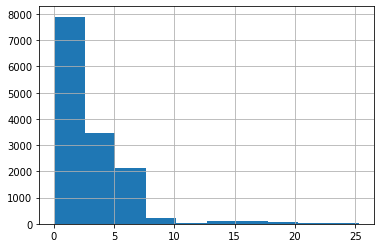

In [32]:
df["resolution_ratio"].hist()

In [33]:
df[["#questions", "G_violations", "resolution_ratio"]].describe()

,#questions,G_violations,resolution_ratio
count,14068.000000,14068.000000,14068.000000
mean,82.009170,166.032912,3.307014
std,198.398068,245.210582,3.053568
min,1.000000,5.000000,0.072165
25%,7.000000,19.000000,1.500000
50%,19.000000,55.000000,2.250000
75%,75.000000,269.000000,4.000000
max,2750.000000,1475.000000,25.294118


## F1

In [34]:
def truth(G_opt, G):
    truth = set()
    
    for u in G.nodes:
        if(G.nodes[u]['label'] != G_opt.nodes[u]['label']):
            truth.add((u, G_opt.nodes[u]['label']))
    
    return truth

df["truth"] = df.apply(lambda x: truth(x["G_opt"], x["G"]), axis=1)

def modified(G, R):
    modified = set()
    
    for u in G.nodes:
        if(G.nodes[u]['label'] != R.nodes[u]['label']):
            modified.add((u, R.nodes[u]['label']))
    
    return modified

df["modified"] = df.apply(lambda x: modified(x["G"], x["G'"]), axis=1)

def tp(truth, modified):    
    return truth & modified

df["tp"] = df.apply(lambda x: tp(x["truth"], x["modified"]), axis=1)

def fp(modified, tp):
    return modified - tp
                         
df["fp"] = df.apply(lambda x: fp(x["modified"], x["tp"]), axis=1)


def fn(truth, fp, tp):
    return ((truth - fp) - tp)
df["fn"] = df.apply(lambda x: fn(x["truth"], x["fp"], x["tp"]), axis=1)
                         
#sanity check:
print(df.apply(lambda x: len(x["tp"] & x["fp"] & x["tp"]), axis=1).sum() == 0)

True


In [35]:
df["precision"] = df.apply(lambda x: len(x["tp"]) / ( len(x["tp"]) + len(x["fp"])), axis=1)
df["recall"] = df.apply(lambda x: len(x["tp"]) / ( len(x["tp"]) + len(x["fn"])), axis=1)

df["f1"] = df.apply(lambda x: 2*len(x["tp"]) / ( 2*len(x["tp"]) + len(x["fp"]) + len(x["fn"])), axis=1)

<AxesSubplot:>

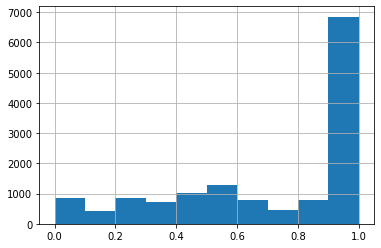

In [36]:
df["f1"].hist()

In [37]:
df.query("user == 'userGreedy'")["f1"].describe()

count    6186.000000
mean        0.569897
std         0.316050
min         0.000000
25%         0.333333
50%         0.545455
75%         0.897879
max         1.000000
Name: f1, dtype: float64

## Question Difficulty

In [38]:
def total_q_difficulty(qds, alpha=0.5, beta=0.5):
    sum = 0
    for (a,b) in qds:
        sum += a*alpha + b*beta
    return sum

df["qd"] = df["Q_difficulty"].apply(lambda x: total_q_difficulty(x))
df["mqd"] = df["qd"] / df["#questions"]

<AxesSubplot:>

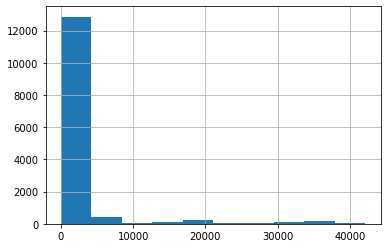

In [39]:
df["qd"].hist()

In [40]:
df[["qd", "mqd"]].describe()

,qd,mqd
count,14068.000000,14068.000000
mean,1889.241079,33.178467
std,6114.428476,102.354315
min,2.000000,2.000000
25%,37.500000,3.000000
50%,148.000000,4.200000
75%,535.500000,7.979167
max,42126.000000,689.500000


In [41]:
df.to_pickle('temp/metrics.pickle')

# Analysis

## complete results tables

In [42]:
print(df.groupby(["dataset", "noise", "user", "framework"])[["resolution_ratio", "f1", "qd"]].mean().to_string())

                                               resolution_ratio        f1            qd
dataset     noise        user       framework                                          
coauthor    (0.08, 0.12) userGreedy bool               0.447775  0.181600    286.500000
                                    gree               2.198826  0.421800    309.075000
                                    perm               2.228447  0.486063   6688.150000
                                    term               2.228447  0.427276    295.050000
                         userOracle bool               0.289809  0.536990    250.650000
                                    gree               2.197235  0.981940    344.500000
                                    perm               2.207397  1.000000   6791.575000
                                    term               2.186023  0.981940    300.125000
                         userRandom bool               0.217867  0.070606    361.950000
                                

In [43]:
df.groupby(["user", "framework"])[["resolution_ratio", "f1"]].describe()

resolution_ratio                                          \
                                count      mean       std       min       25%   
user       framework                                                            
userGreedy bool                1371.0  1.327310  1.362078  0.072165  0.600000   
           gree                1605.0  4.065491  3.211634  1.000000  2.000000   
           perm                1605.0  4.198144  3.319241  1.000000  2.076923   
           term                1605.0  4.054309  3.182056  1.000000  2.014706   
userOracle bool                1106.0  1.176634  1.317830  0.135802  0.460623   
           gree                1604.0  4.014027  3.216893  0.666667  2.000000   
           perm                1605.0  4.155209  3.322155  0.714286  2.029851   
           term                1605.0  4.031525  3.220060  1.000000  2.000000   
userRandom bool                 136.0  0.384691  0.340636  0.089744  0.219089   
           gree                 161.0  0.790775  0.791741  0.172131  0.439024   
           perm                  60.0  0.216168  0.021324  0.163175  0.206416   
           term                1605.0  2.405518  1.741179  1.000000  1.370000   

                                                         f1            \
                           50%       75%        max   count      mean   
user       framework                                                    
userGreedy bool       1.000000  1.500000  10.866667  1371.0  0.442958   
           gree       3.056818  5.350000  25.294118  1605.0  0.608060   
           perm       3.176471  5.666667  25.294118  1605.0  0.603465   
           term       3.055556  5.500000  25.294118  1605.0  0.606599   
userOracle bool       0.729730  1.354237   9.976190  1106.0  0.639305   
           gree       3.000000  5.500000  25.294118  1604.0  0.984079   
           perm       3.111111  5.833333  25.294118  1605.0  0.990201   
           term       3.000000  5.526316  25.294118  1605.0  0.969132   
userRandom bool       0.315057  0.351298   2.500000   136.0  0.168272   
           gree       0.641026  0.719807   5.494382   161.0  0.215267   
           perm       0.217881  0.230909   0.256944    60.0  0.058075   
           term       1.868966  3.000000  15.518519  1605.0  0.606599   

                                                                        \
                           std       min       25%       50%       75%   
user       framework                                                     
userGreedy bool       0.290343  0.000000  0.222222  0.400000  0.632456   
           gree       0.313499  0.000000  0.375000  0.600000  0.937500   
           perm       0.313473  0.000000  0.346774  0.586207  0.936508   
           term       0.314502  0.000000  0.378378  0.600000  0.933333   
userOracle bool       0.290486  0.000000  0.444659  0.600000  0.969111   
           gree       0.043869  0.500000  1.000000  1.000000  1.000000   
           perm       0.033074  0.714286  1.000000  1.000000  1.000000   
           term       0.068800  0.444444  0.971963  1.000000  1.000000   
userRandom bool       0.217561  0.000000  0.070183  0.089100  0.126247   
           gree       0.242510  0.000000  0.069767  0.092655  0.230769   
           perm       0.013977  0.024390  0.049232  0.056995  0.065315   
           term       0.314502  0.000000  0.378378  0.600000  0.933333   

                                
                           max  
user       framework            
userGreedy bool       1.000000  
           gree       1.000000  
           perm       1.000000  
           term       1.000000  
userOracle bool       1.000000  
           gree       1.000000  
           perm       1.000000  
           term       1.000000  
userRandom bool       0.971429  
           gree       0.816327  
           perm       0.088496  
           term       1.000000

In [44]:
df.groupby(["dataset", "noise"])[["qd", "mqd"]].mean()

qd         mqd
dataset     noise                                
coauthor    (0.08, 0.12)  1735.268349  145.315392
            (0.18, 0.22)  3731.018605  146.927076
            (0.27, 0.33)  5966.306220  152.128020
generated   (0.27, 0.33)  1715.240851   30.030242
restaurants (0.08, 0.12)   368.296209    4.401120
            (0.18, 0.22)   561.472222    4.506011
            (0.27, 0.33)   694.869792    4.556173
sepsis      (0.08, 0.12)  2007.822917    7.599394
            (0.18, 0.22)  4346.510417    7.615226
            (0.27, 0.33)  6417.085417    7.619318

## Pareto Efficiency

In [45]:
# credits to Peter : https://stackoverflow.com/questions/32791911/fast-calculation-of-pareto-front-in-python
# modified to maximize instead of minimize
def is_pareto_efficient_simple(costs):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
    """
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        if is_efficient[i]:
            is_efficient[is_efficient] = np.any(costs[is_efficient]>c, axis=1)  # Keep any point with a higher cost
            is_efficient[i] = True  # And keep self
    return is_efficient

In [46]:
df_pareto = df.copy()
df_pareto["-mqd"] = -df_pareto["mqd"] # we need to maximize
# aggregate by (user, dataset, framework) triple
df_pareto = df_pareto.groupby(["user", "dataset", "framework"]).mean().reset_index()

In [47]:
pareto_results = pd.DataFrame()
for i,g in df_pareto.groupby(["user", "dataset"]):
    g["p_efficient"] = is_pareto_efficient_simple(g[["f1", "resolution_ratio", "-mqd"]].to_numpy())
    pareto_results= pd.concat([pareto_results, g[["user", "dataset", "framework", "p_efficient"]]])
    #print(g[["user", "dataset", "framework", "p_efficient"]])
    #print(i, g.groupby("framework")["p_efficient"].sum())
pareto_results[["user", "dataset", "framework", "p_efficient"]]

,user,dataset,framework,p_efficient
0,userGreedy,coauthor,bool,True
1,userGreedy,coauthor,gree,False
2,userGreedy,coauthor,perm,True
3,userGreedy,coauthor,term,True
4,userGreedy,generated,bool,True
5,userGreedy,generated,gree,True
6,userGreedy,generated,perm,True
7,userGreedy,generated,term,True
8,userGreedy,restaurants,bool,False
9,userGreedy,restaurants,gree,True


## Plots

In [48]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [49]:
user_map = {"userRandom" : "Random",
            "userGreedy" : "MaxFix",
            "userOracle" : "Oracle"}
framework_map = {"bool" : "F Bool",
                 "gree" : "F Greedy",
                 "perm" : "F Permissive",
                 "term" : "F Term"}
dataset_map = {"generated"  : "synthetic",
               "coauthor"   : "coauthor",
               "sepsis"     : "sepsis",
               "restaurants": "restaurants",
               "":""}

## Synthetic Data

In [50]:
df_11 = df.query("noise == '(0.27, 0.33)' & dataset == 'generated'").copy()

### F1 per (framework, random, size)

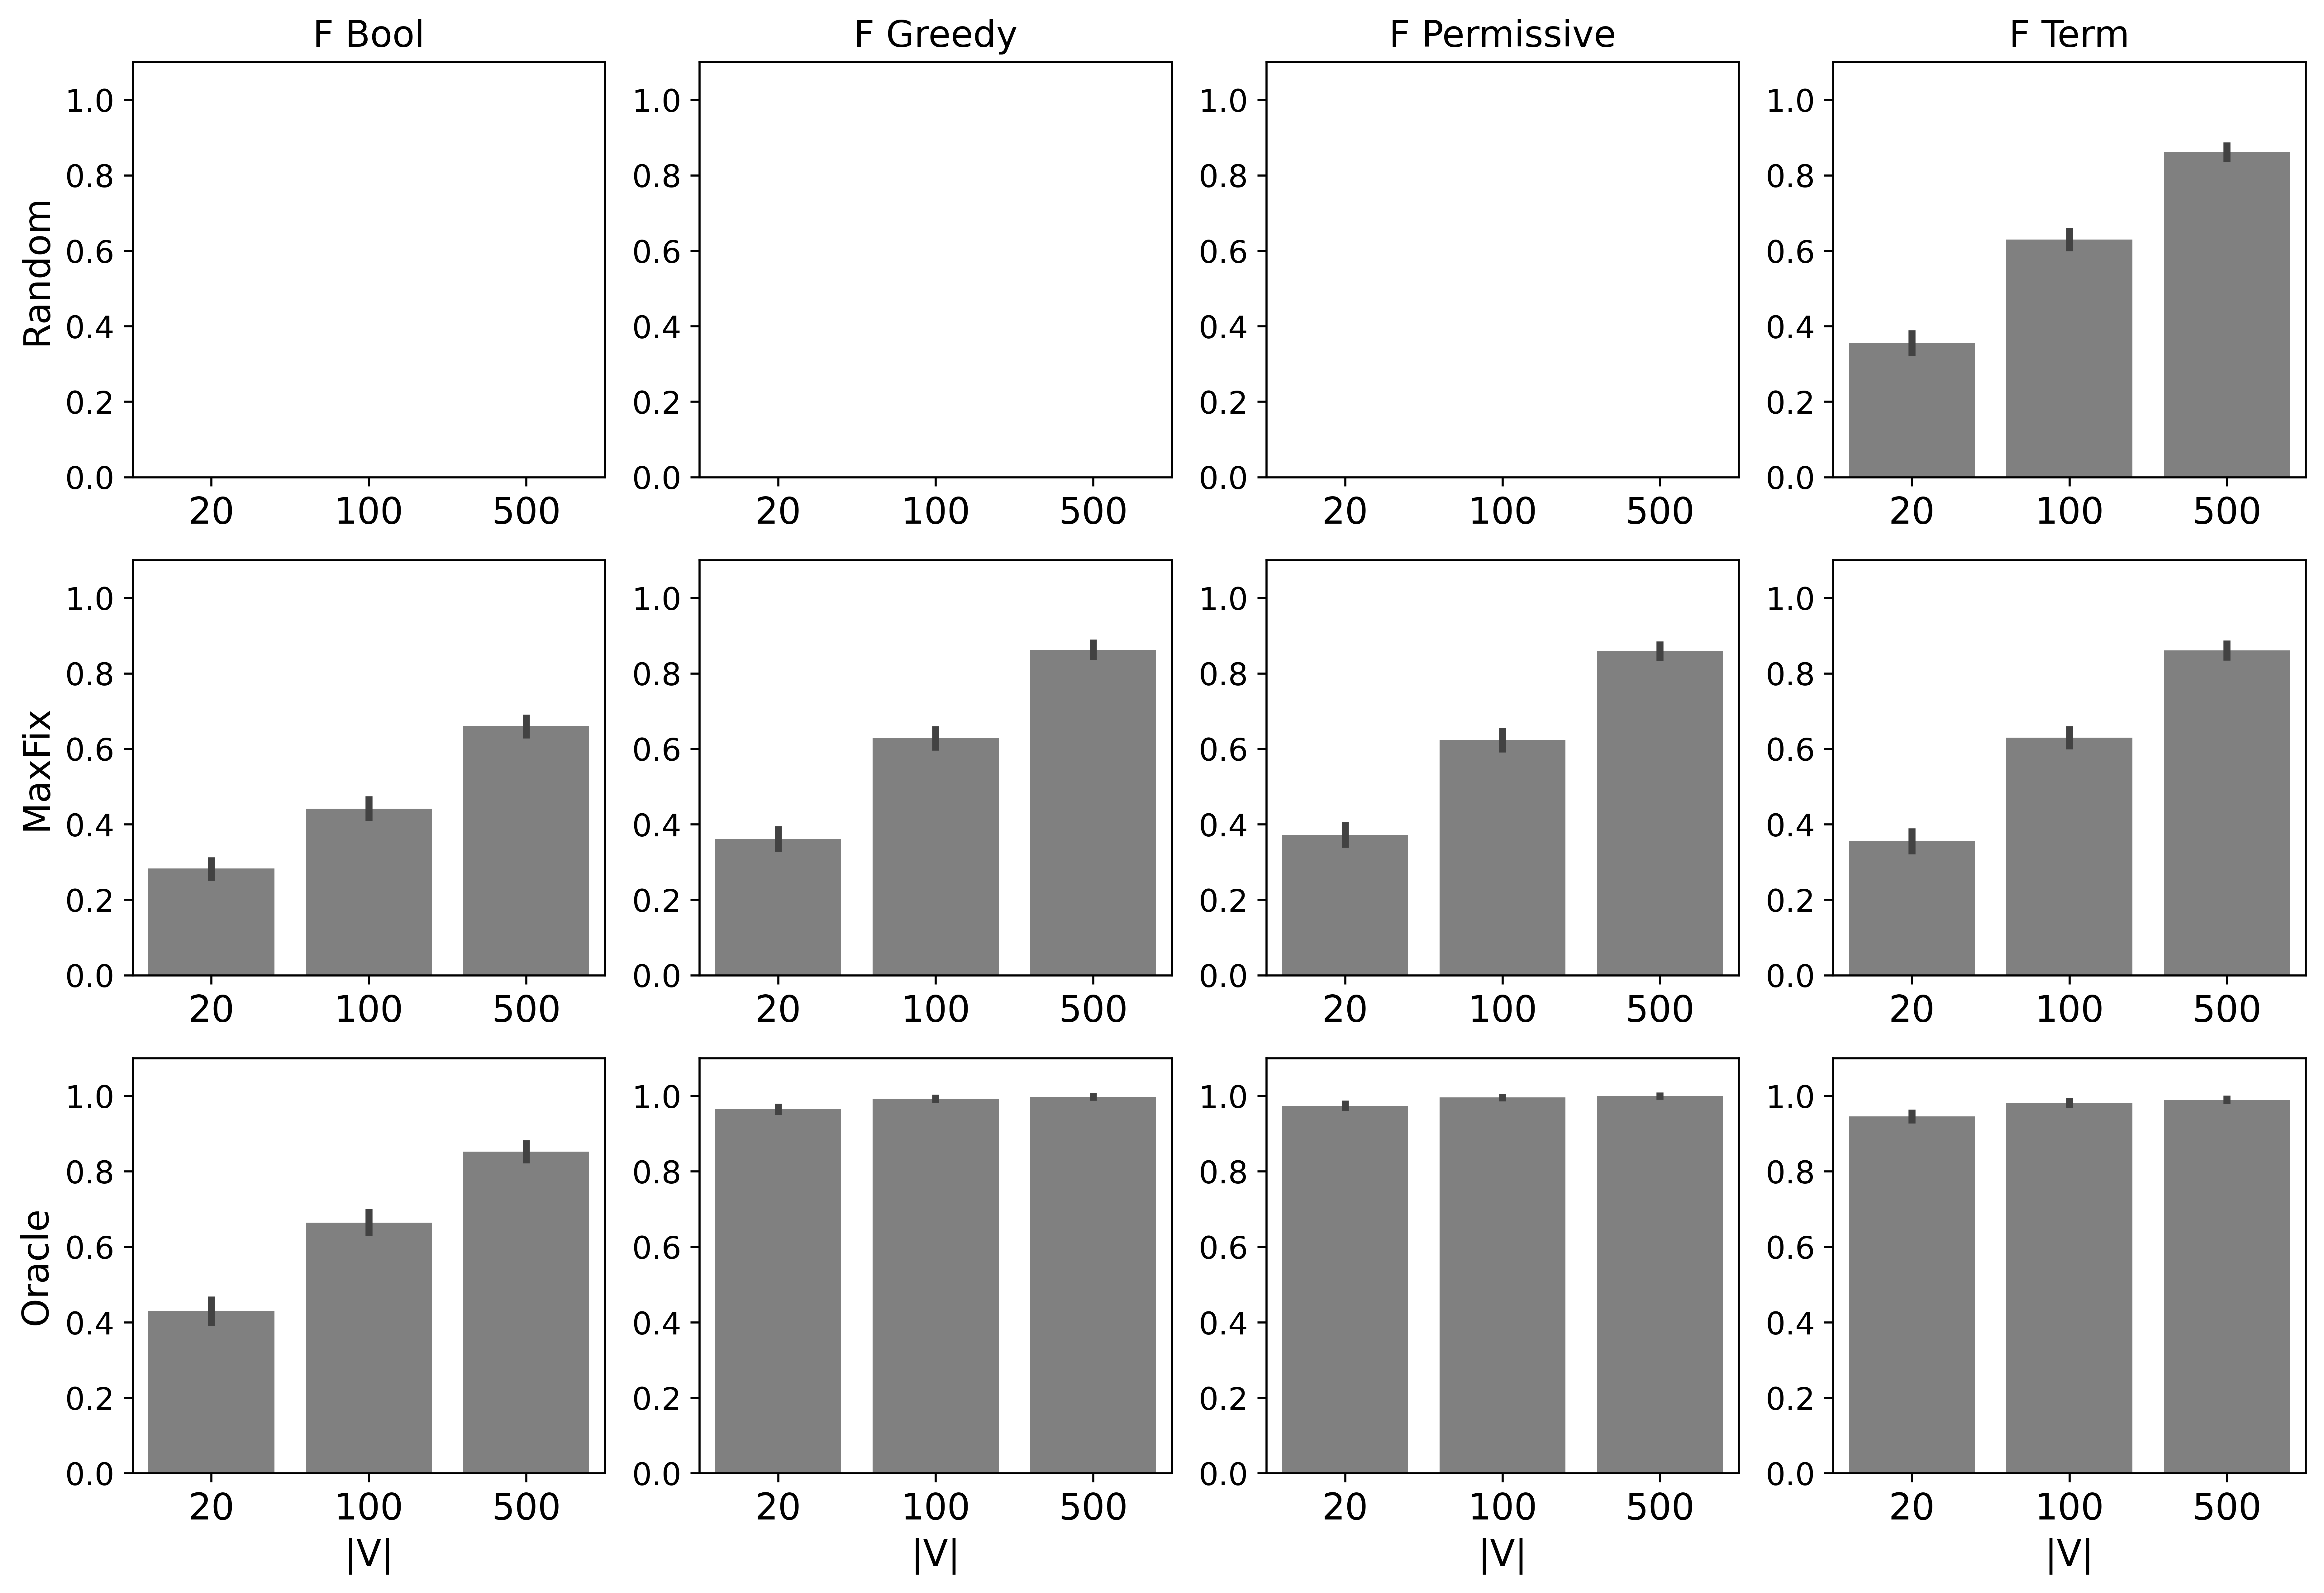

In [68]:
fig, axs = plt.subplots(3,4, figsize = (15, 10), sharex="row", dpi=600)

for i,user in enumerate(df["user"].unique()):
  for j,framework in enumerate(["bool", "gree", "perm", "term"]):
    df_temp = df_11.query("user == '" + user + "' & framework == '" + framework + "'")
    if(df_temp.size > 0):
        sns.barplot(data=df_temp,
                    x="V", y="f1",
                    orient = "v",
                    ax=axs[i,j],
                    color="gray")
    axs[i,j].set_ylim([0, 1.1])
    axs[i,j].set(xlabel=None, ylabel=None)
    
for j,framework in enumerate(["bool", "gree", "perm", "term"]):
    axs[0, j].set(title=framework_map[framework])
    axs[2, j].set(xlabel="|V|")
    
for i,user in enumerate(df["user"].unique()):
    axs[i, 0].set(ylabel=user_map[user])

### RR per (framework, random, size)

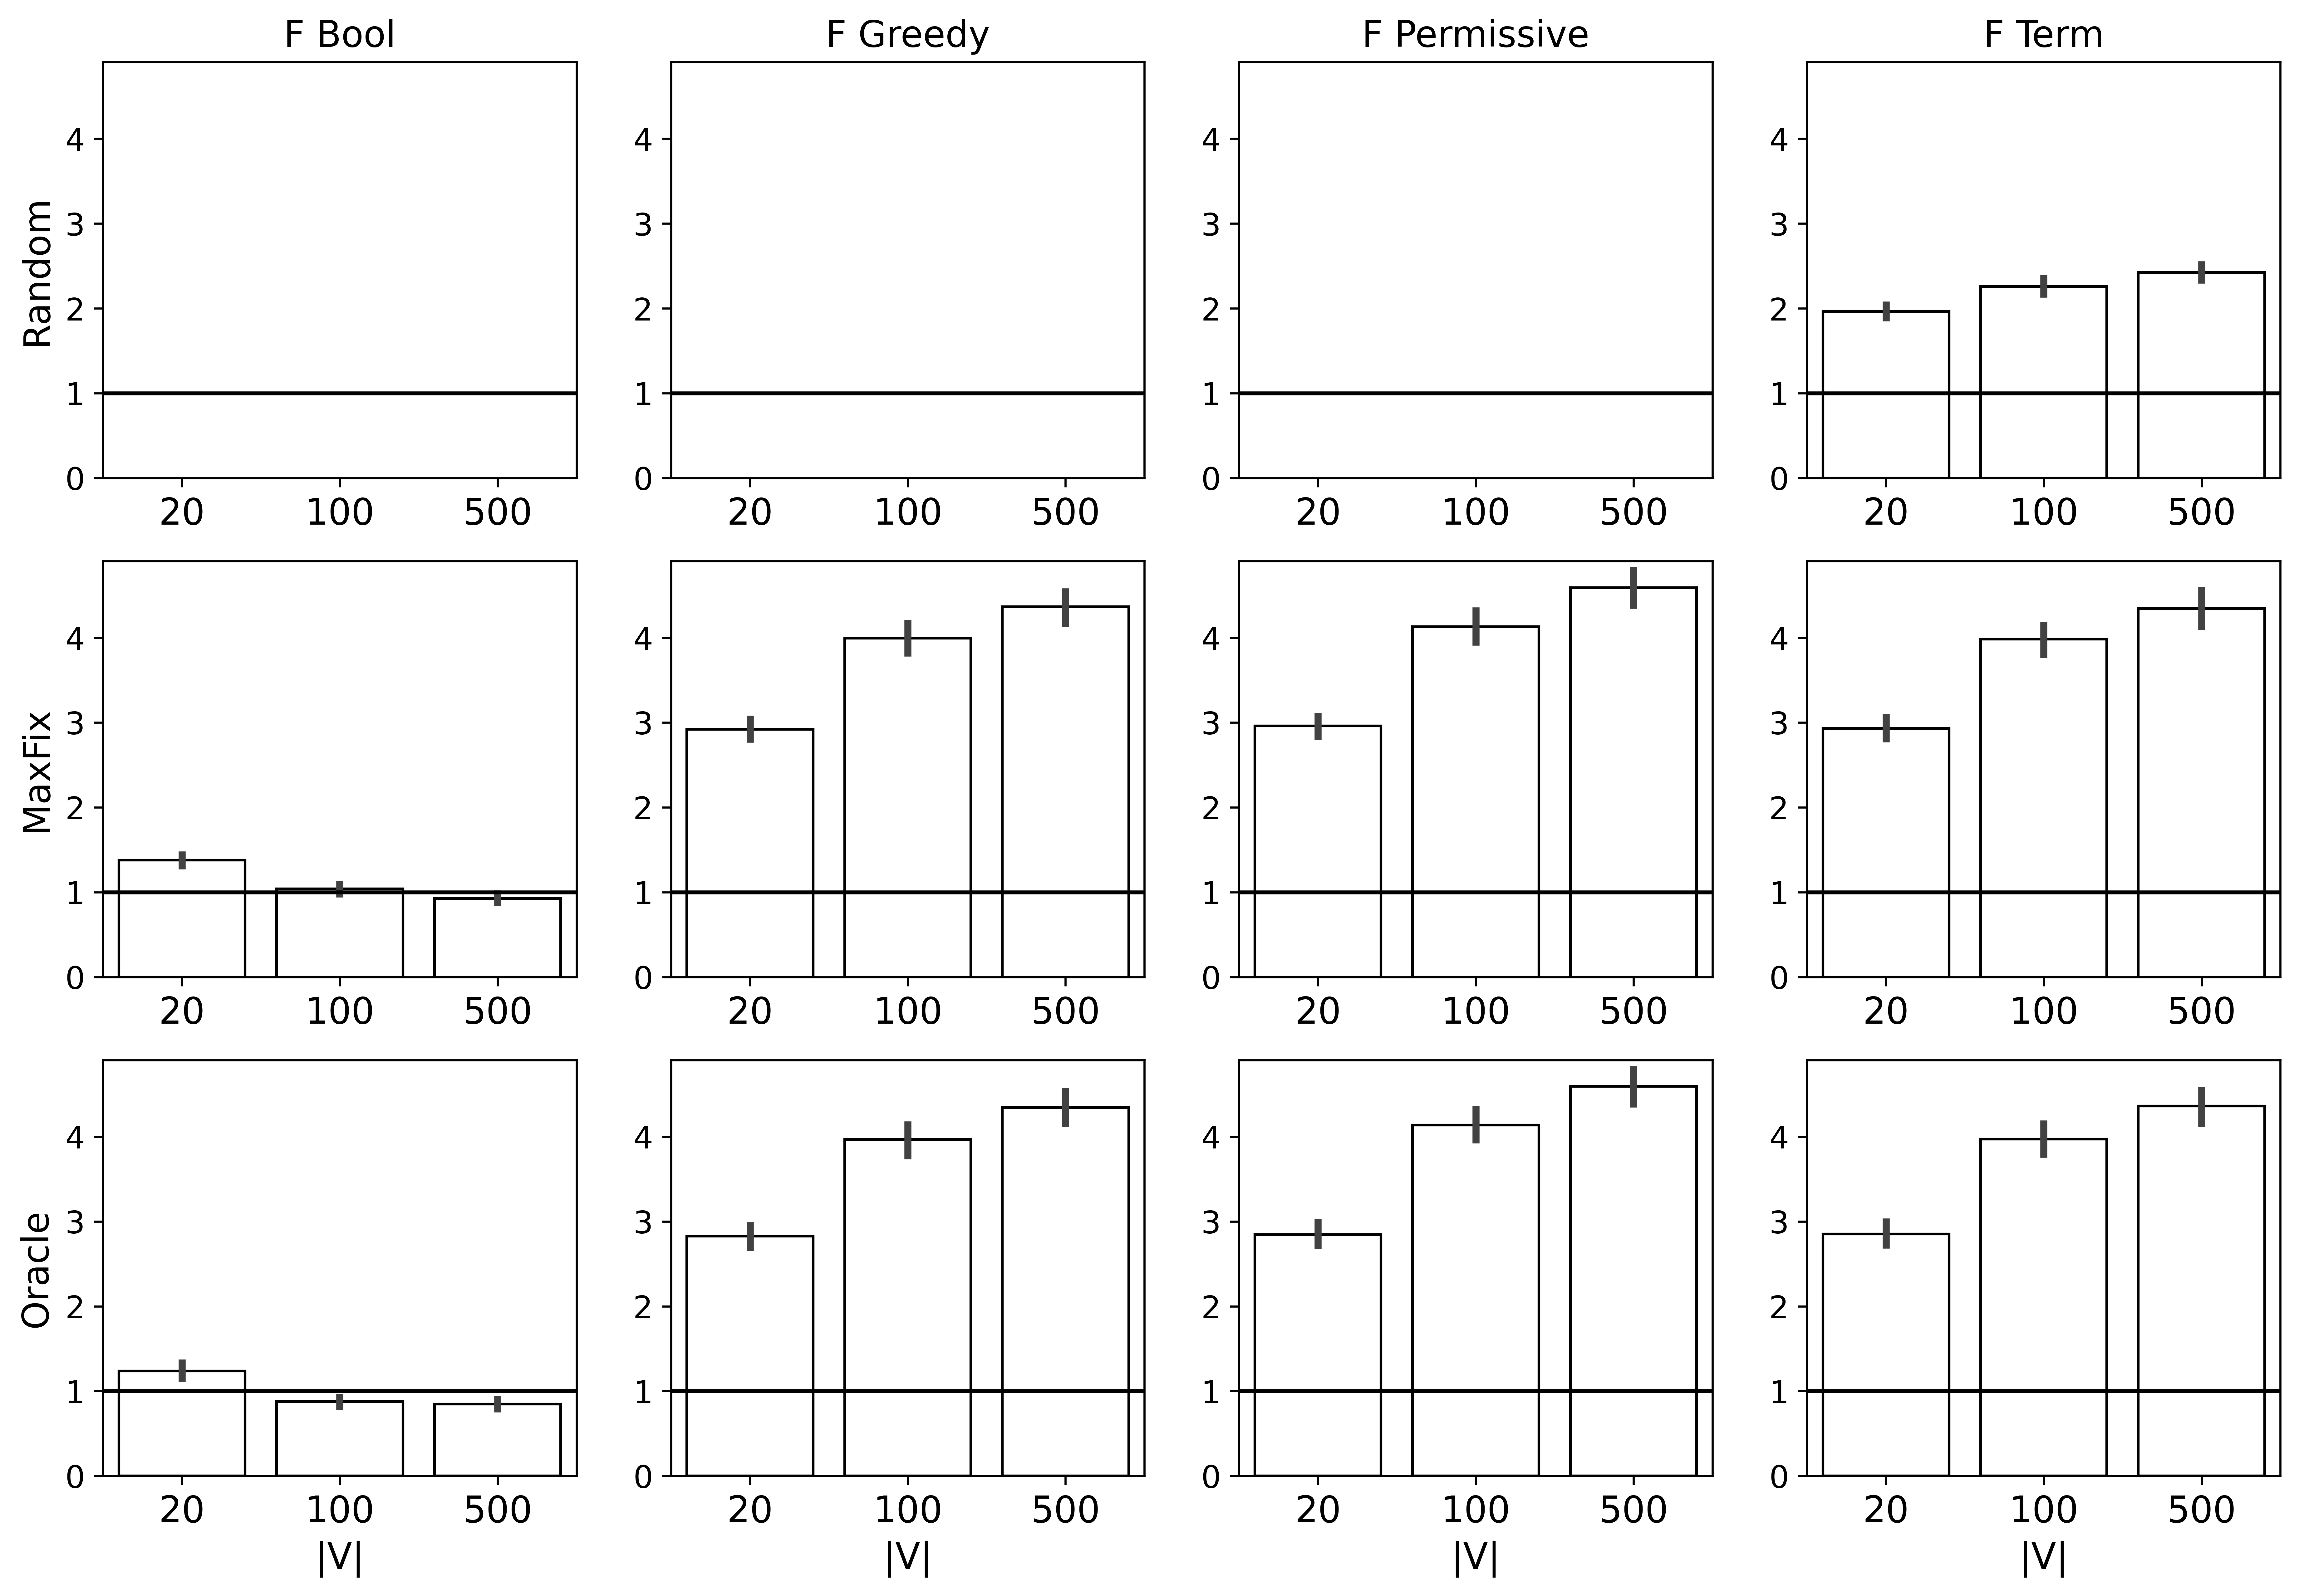

In [69]:
fig, axs = plt.subplots(3,4, figsize = (15, 10), sharex="row", dpi=600)

for i,user in enumerate(df["user"].unique()):
  for j,framework in enumerate(["bool", "gree", "perm", "term"]):
    df_temp = df_11.query("user == '" + user + "' & framework == '" + framework + "'")
    if(df_temp.size > 0):
        sns.barplot(data=df_temp,
                    x="V", y="resolution_ratio",
                    orient = "v",
                    ax=axs[i,j],
                    edgecolor="black", color="white",
                   )
    axs[i,j].set_ylim([0, 4.9])
    axs[i,j].set(xlabel=None, ylabel=None)
    axs[i,j].axhline(1, color="black")
    
for j,framework in enumerate(["bool", "gree", "perm", "term"]):
    axs[0, j].set(title=framework_map[framework])
    axs[2, j].set(xlabel="|V|")
    
for i,user in enumerate(df["user"].unique()):
    axs[i, 0].set(ylabel=user_map[user])

## Datasets

In [58]:
df_12 = df.query("noise == '(0.27, 0.33)'").copy()

In [59]:
# aggregate by (user, framework, dataset) triple
# report for (user, framework)
df_12.groupby(["user", "framework", "dataset"])["f1"].mean()\
     .reset_index()\
     .groupby(["user", "framework"])["f1"].describe()

count      mean       std       min       25%       50%  \
user       framework                                                            
userGreedy bool         4.0  0.408997  0.328246  0.153064  0.172630  0.311286   
           gree         4.0  0.593784  0.229294  0.372489  0.461114  0.547915   
           perm         4.0  0.562544  0.265529  0.307337  0.392638  0.513765   
           term         4.0  0.595717  0.223711  0.385938  0.463851  0.546609   
userOracle bool         4.0  0.661253  0.221187  0.503681  0.521159  0.579523   
           gree         4.0  0.979153  0.004816  0.974432  0.975376  0.978988   
           perm         4.0  0.994175  0.005527  0.989302  0.989530  0.993699   
           term         4.0  0.937174  0.034761  0.896723  0.914383  0.940365   
userRandom bool         2.0  0.075820  0.011520  0.067674  0.071747  0.075820   
           gree         3.0  0.253029  0.299284  0.076022  0.080254  0.084487   
           perm         1.0  0.055483       NaN  0.055483  0.055483  0.055483   
           term         4.0  0.595717  0.223711  0.385938  0.463851  0.546609   

                           75%       max  
user       framework                      
userGreedy bool       0.547654  0.860352  
           gree       0.680586  0.906817  
           perm       0.683671  0.915309  
           term       0.678475  0.903710  
userOracle bool       0.719617  0.982286  
           gree       0.982765  0.984202  
           perm       0.998345  1.000000  
           term       0.963156  0.971244  
userRandom bool       0.079893  0.083966  
           gree       0.341532  0.598578  
           perm       0.055483  0.055483  
           term       0.678475  0.903710

### F1 per (framework, random, dataset)

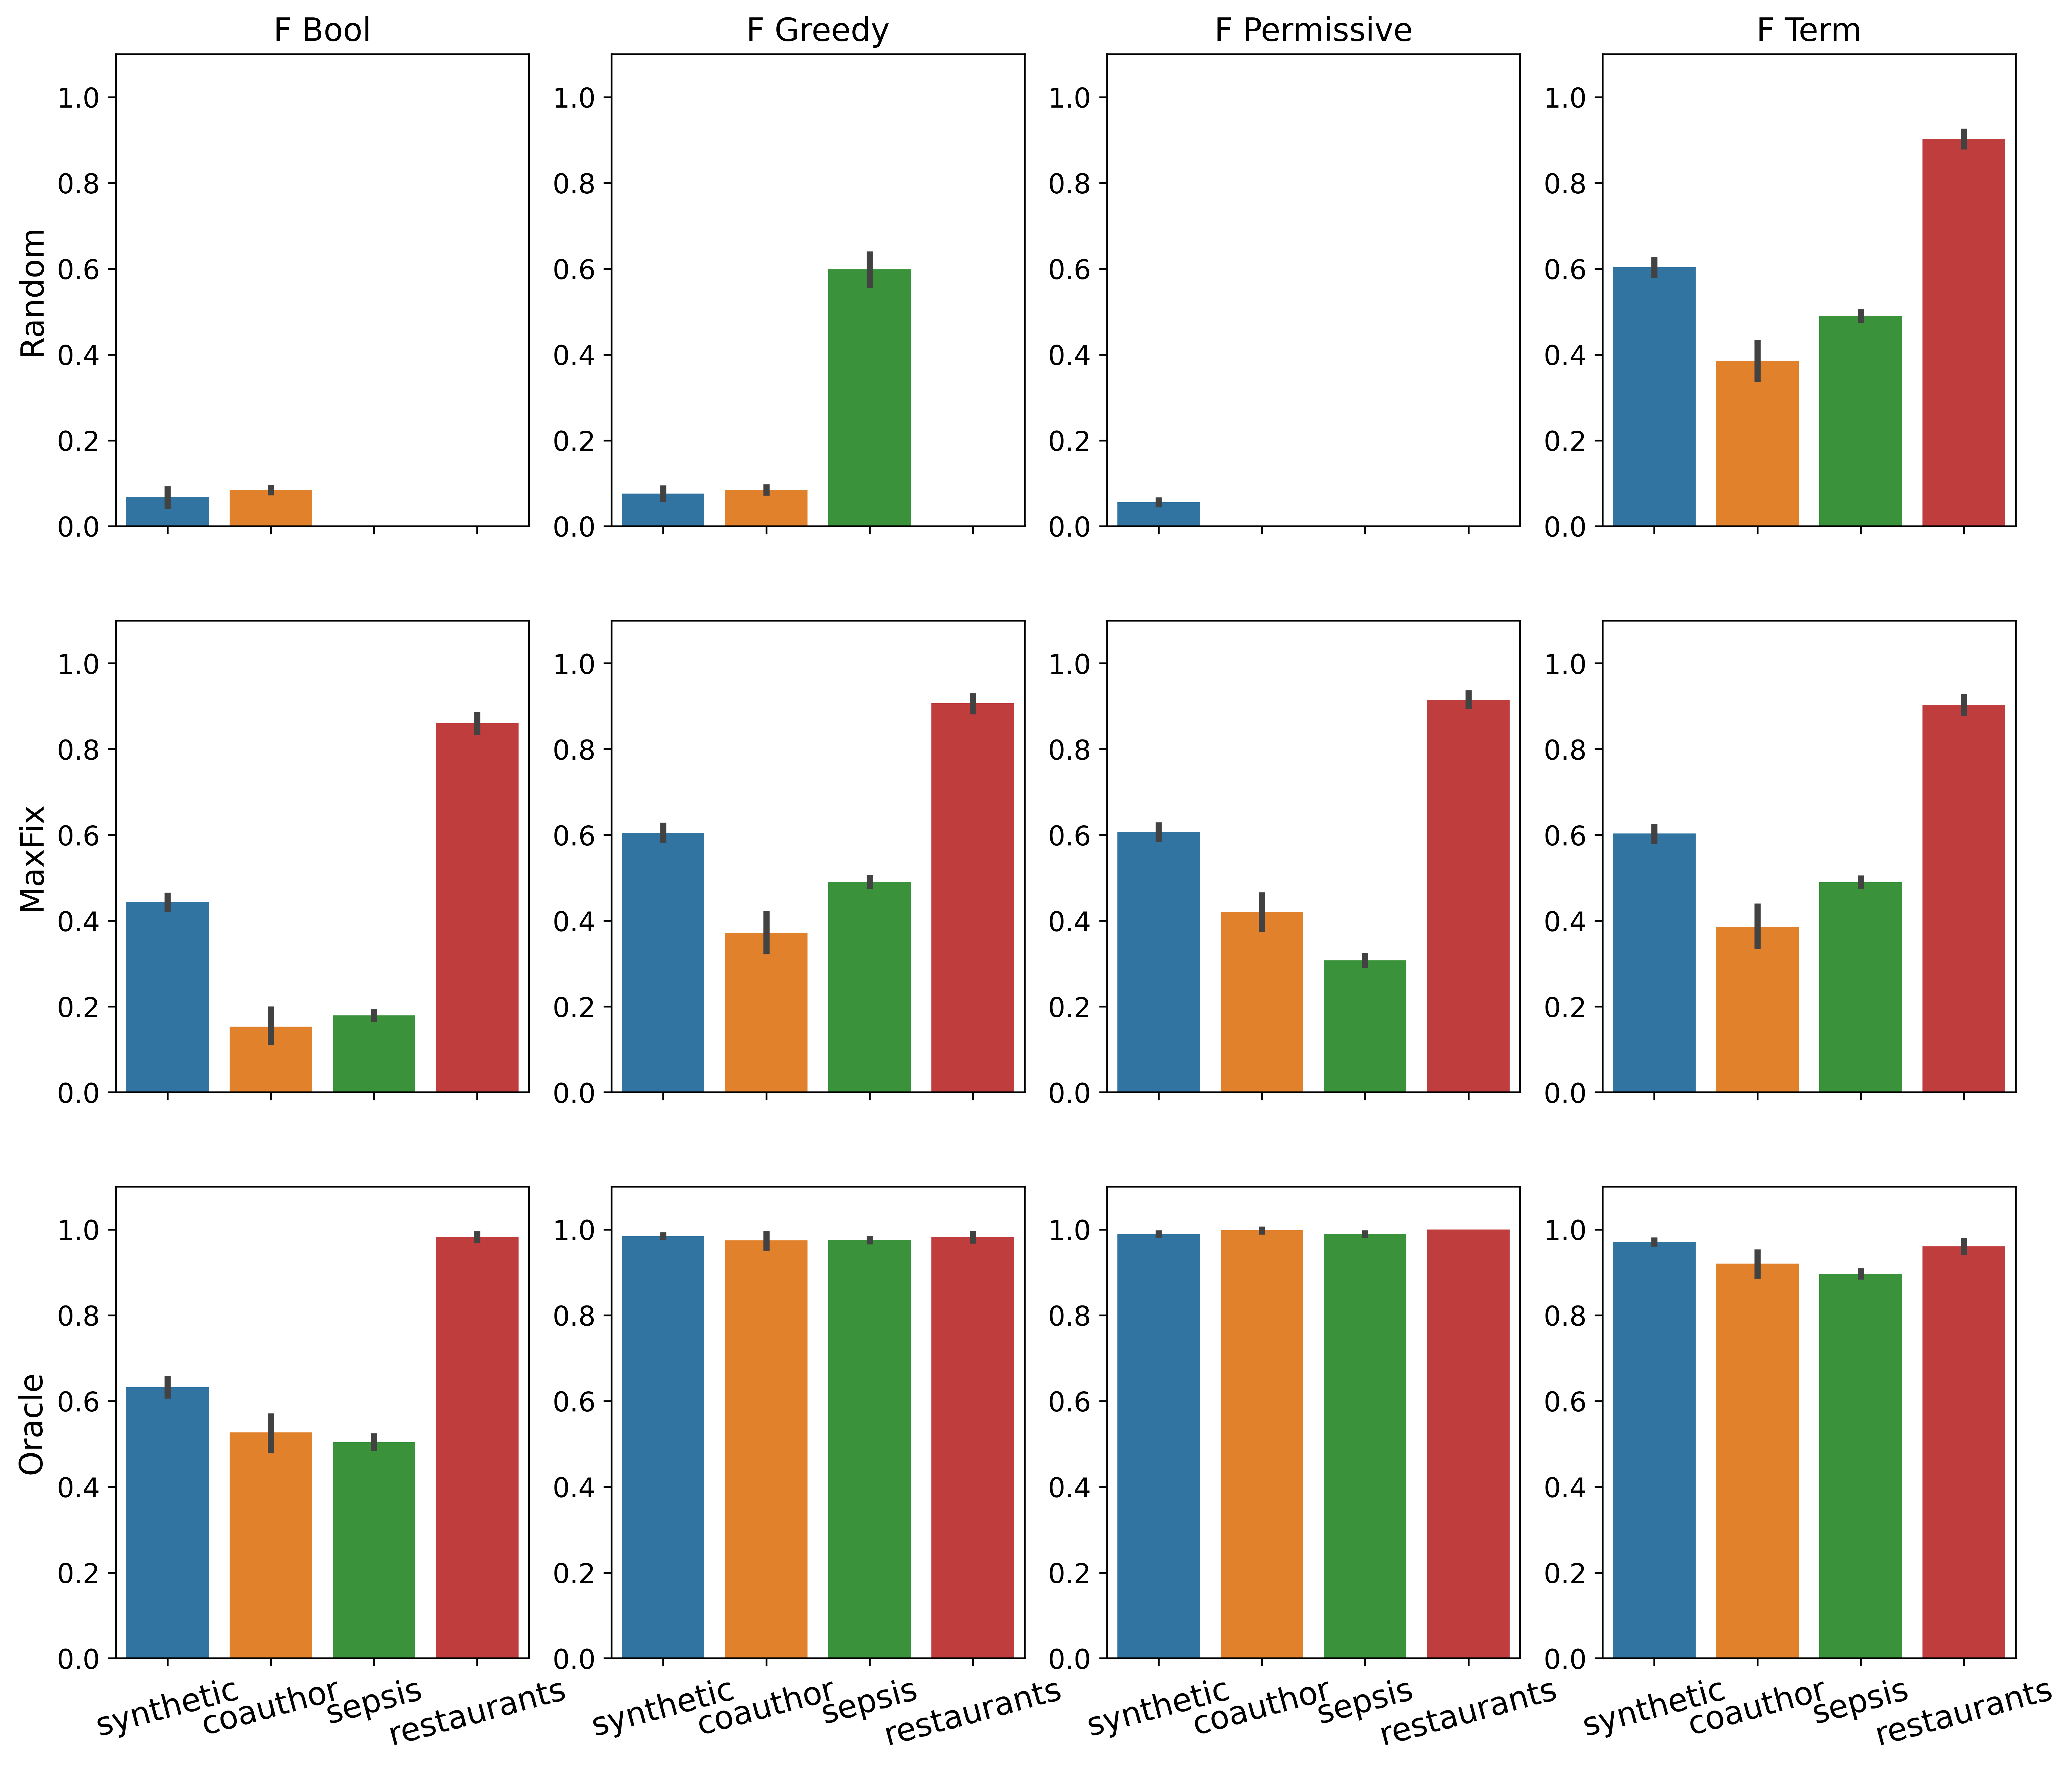

In [70]:
fig, axs = plt.subplots(3,4, figsize = (15, 13), sharex=True, dpi=600)

for i,user in enumerate(df["user"].unique()):
  for j,framework in enumerate(["bool", "gree", "perm", "term"]):
    df_temp = df_12.query("user == '" + user + "' & framework == '" + framework + "'")    

    sns.barplot(data=df_temp,
                x="dataset", y="f1",
                orient = "v",
                ax=axs[i,j])
    
    axs[i,j].set_ylim([0, 1.1])
    axs[i, j].set(xlabel=None, ylabel=None)
    
for a in axs.flatten():
    #a.set(xlabel=None, ylabel=None)
    a.tick_params(axis='x', rotation=15)
    a.set_xticklabels([dataset_map[d.get_text()] for d in a.get_xticklabels()])
    
for j,framework in enumerate(["bool", "gree", "perm", "term"]):
    axs[0, j].set(title=framework_map[framework])
    
for i,user in enumerate(df["user"].unique()):
    axs[i, 0].set(ylabel=user_map[user])

### RR per (framework, random, dataset)

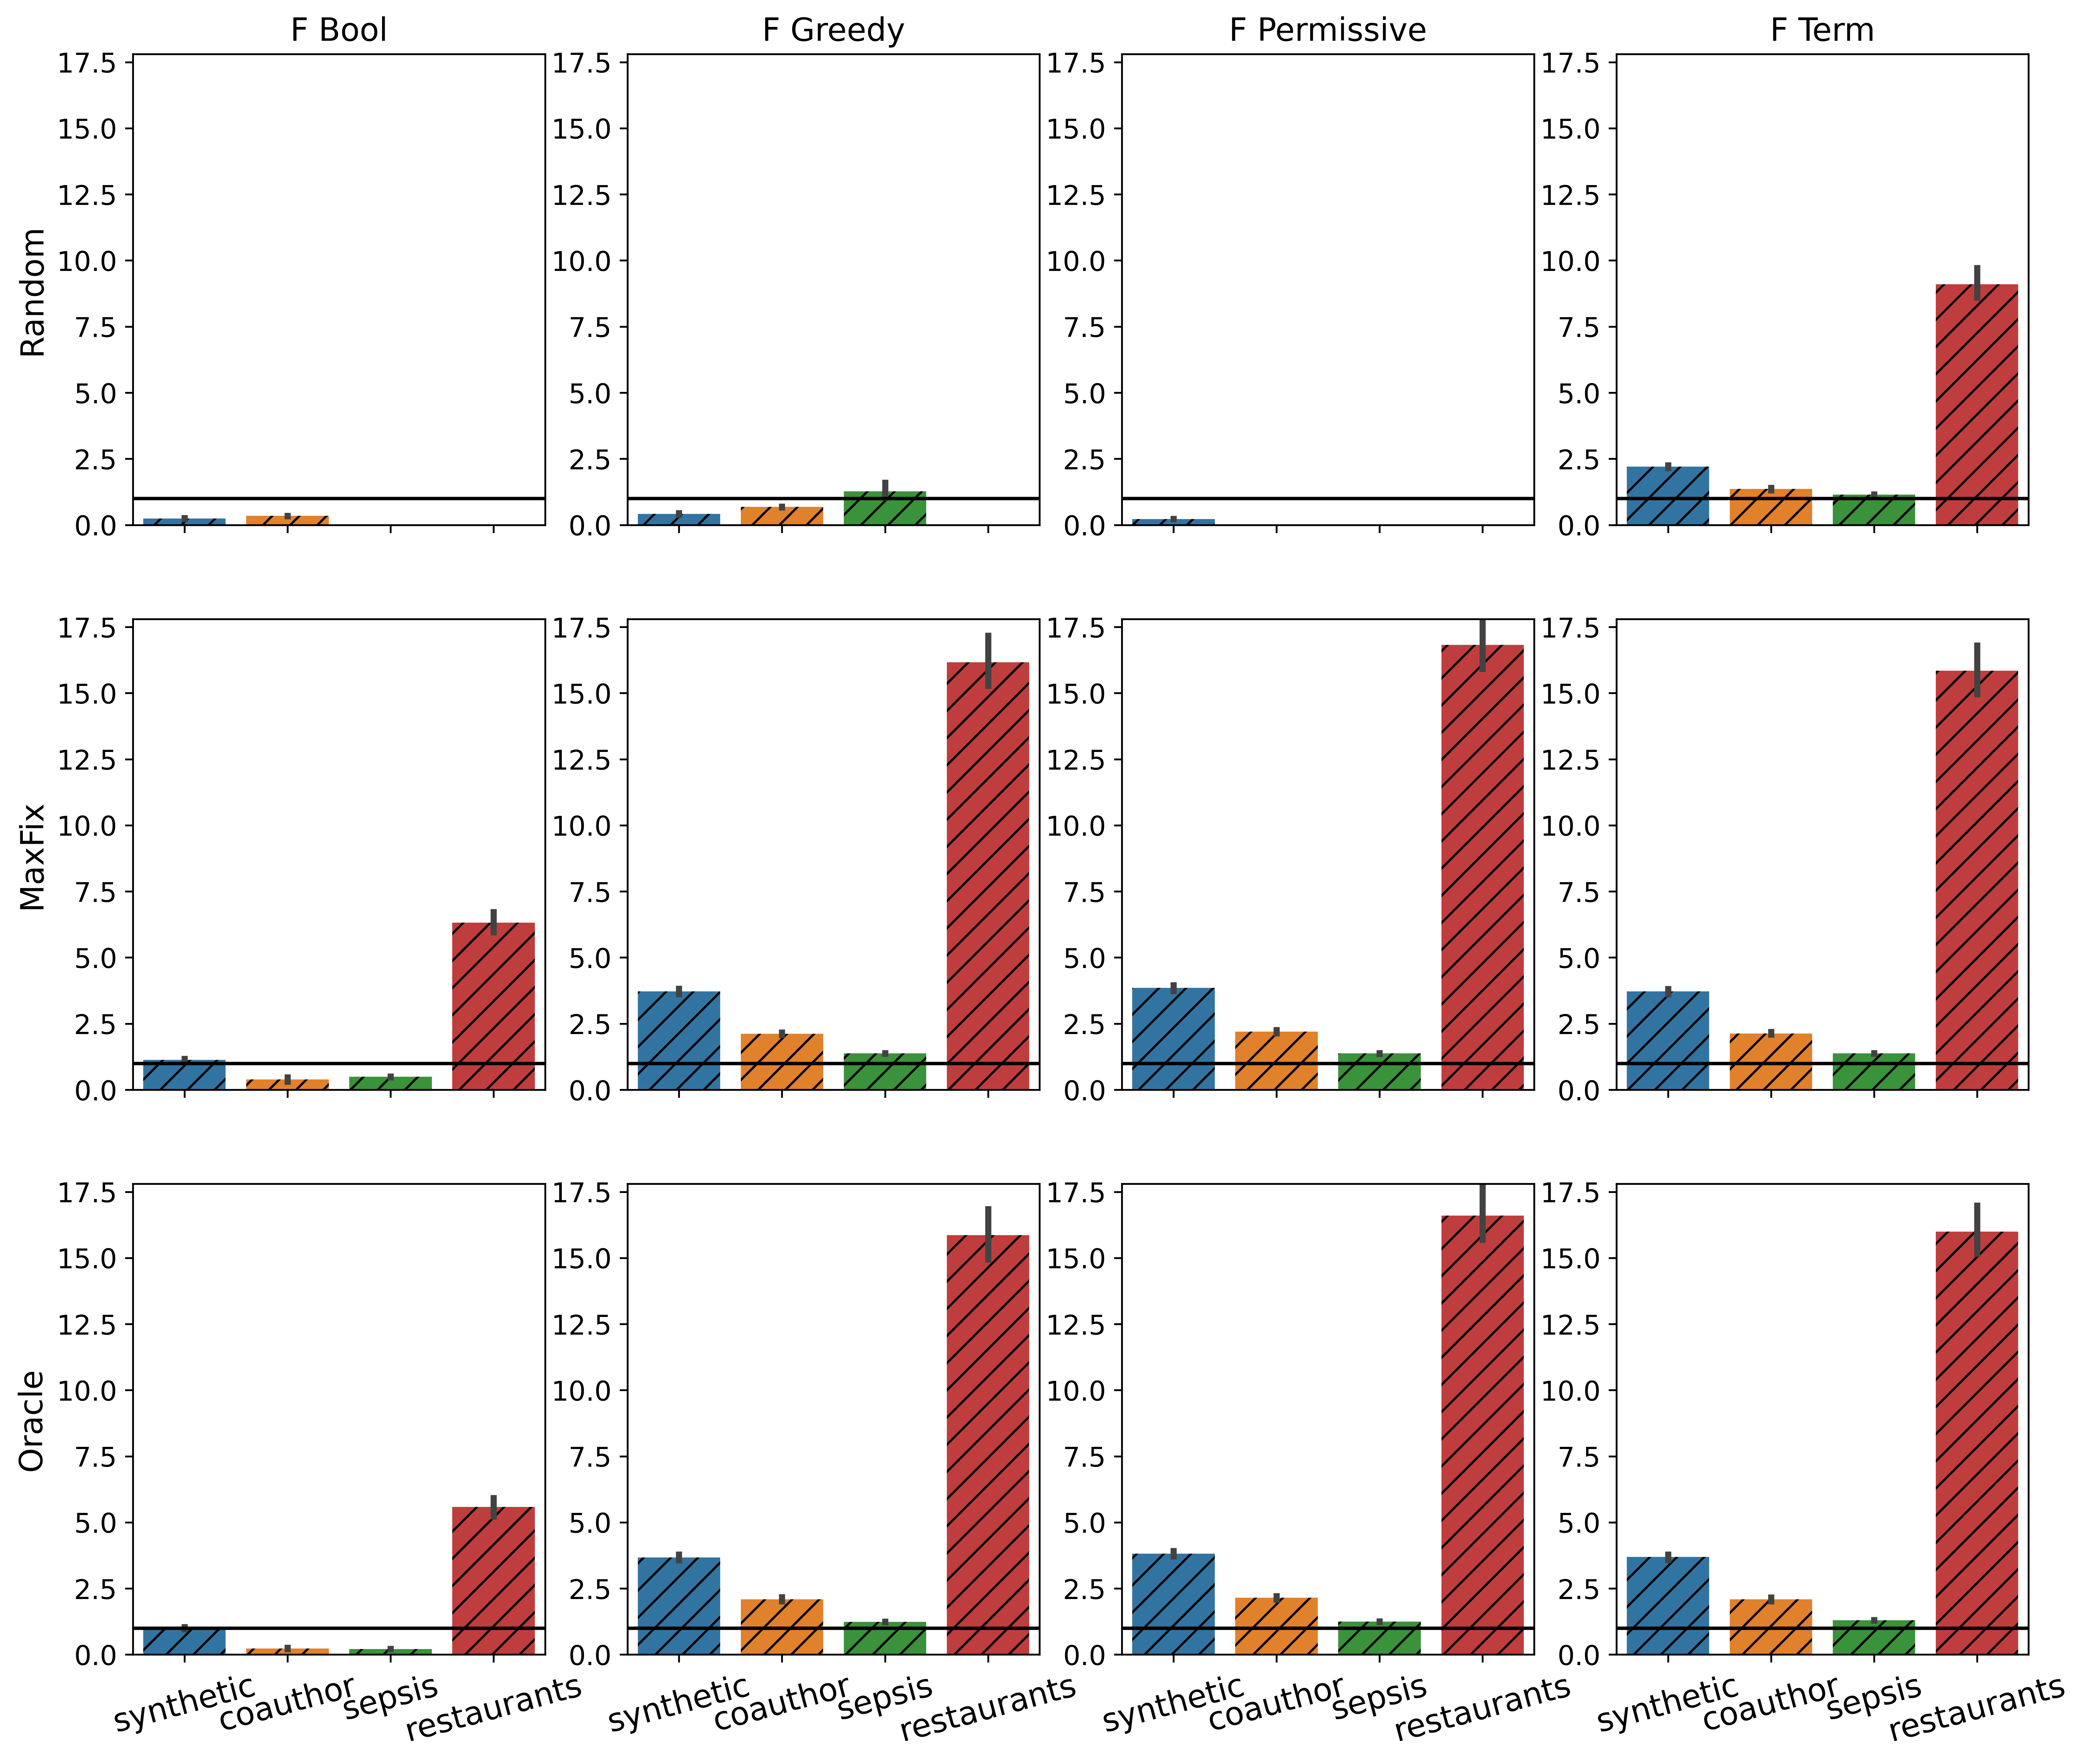

In [71]:
fig, axs = plt.subplots(3,4, figsize = (15, 13), sharex=True, dpi=600)

for i,user in enumerate(df["user"].unique()):
  for j,framework in enumerate(["bool", "gree", "perm", "term"]):
    df_temp = df_12.query("user == '" + user + "' & framework == '" + framework + "'")    

    sns.barplot(data=df_temp,
                x="dataset", y="resolution_ratio",
                orient = "v",
                ax=axs[i,j],
                hatch = "//"
               )
    
    axs[i,j].set_ylim([0, 17.8])
    axs[i, j].set(xlabel=None, ylabel=None)
    axs[i,j].axhline(1, color="black")


    
for a in axs.flatten():
    #a.set(xlabel=None, ylabel=None)
    a.tick_params(axis='x', rotation=15)
    a.set_xticklabels([dataset_map[d.get_text()] for d in a.get_xticklabels()])
    
for j,framework in enumerate(["bool", "gree", "perm", "term"]):
    axs[0, j].set(title=framework_map[framework])
    
for i,user in enumerate(df["user"].unique()):
    axs[i, 0].set(ylabel=user_map[user])

## Question difficulty

Text(0, 0.5, 'mean question difficulty')

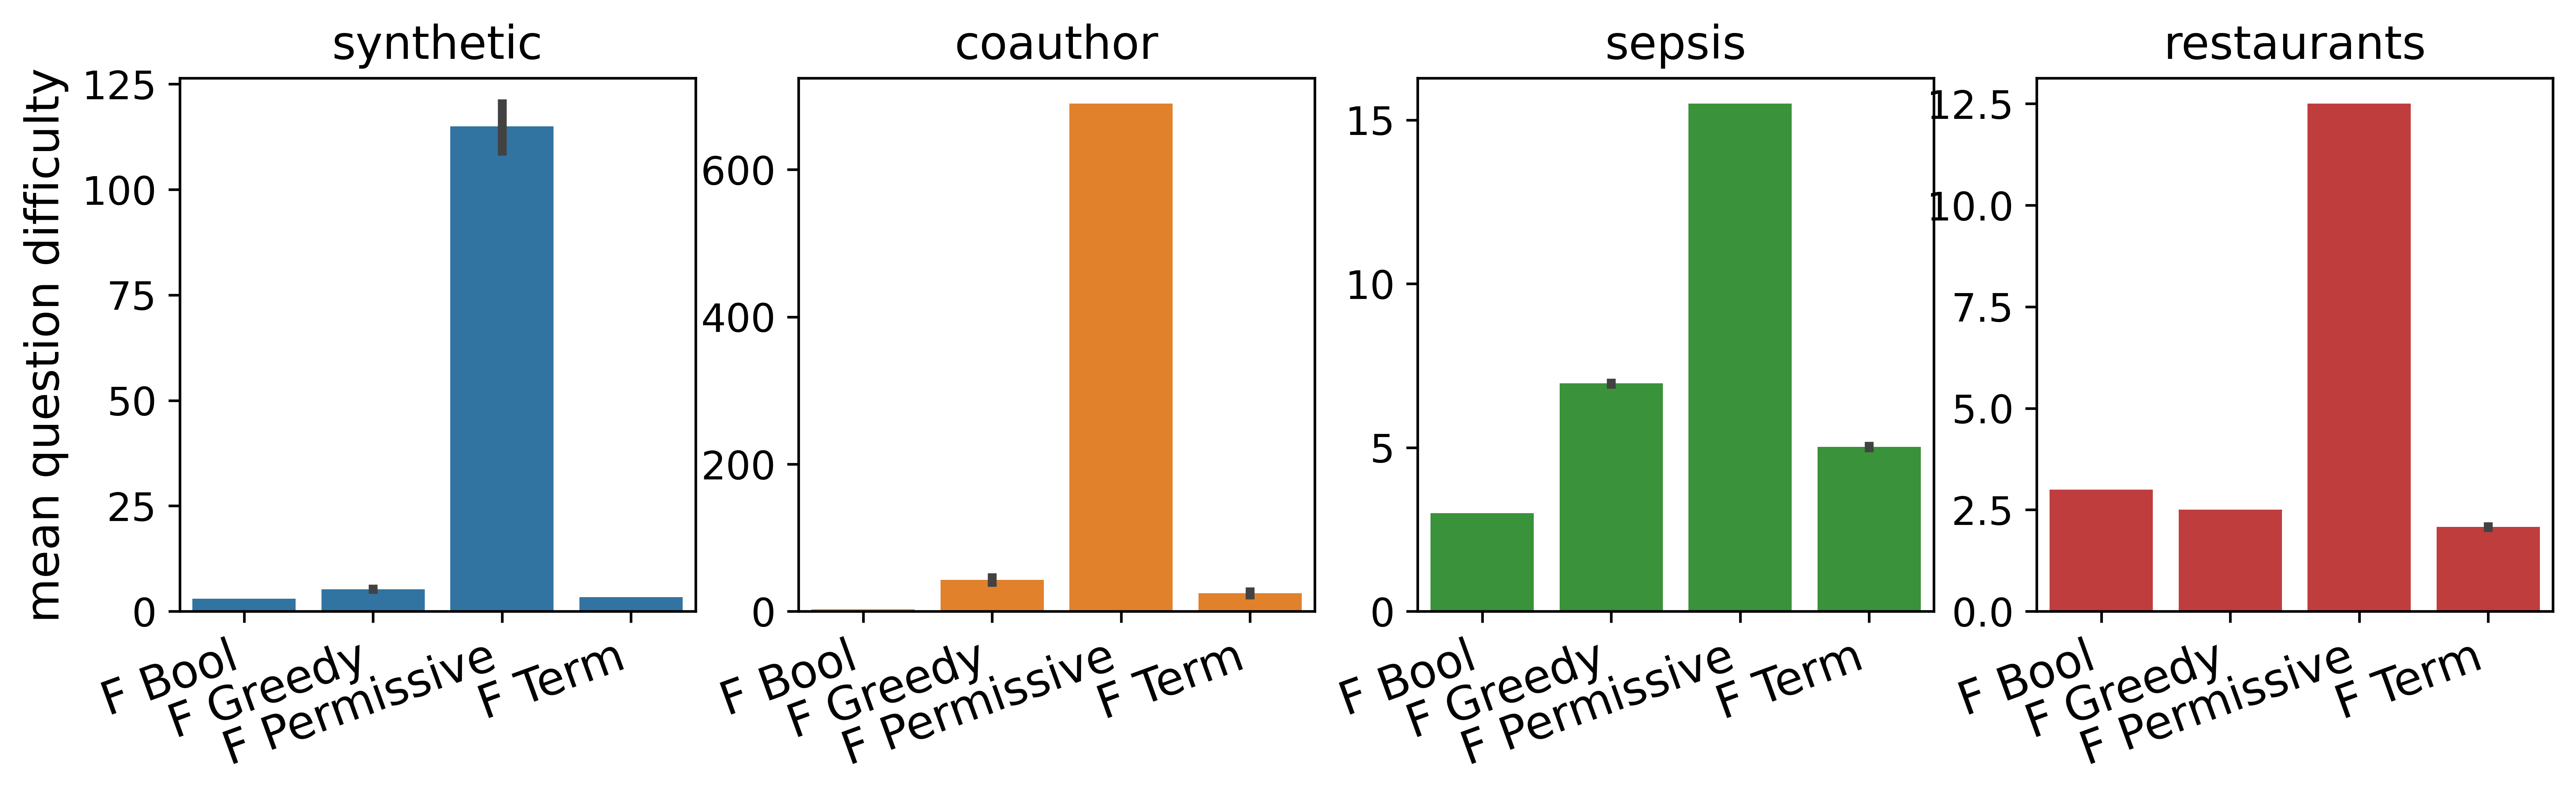

In [81]:
f, axs = plt.subplots(1,4,figsize = (13, 3), dpi=600)

for i,f in enumerate(df_12["dataset"].unique()):
    
    sns.barplot(data=df_12.query("dataset == '" + f + "'"),
                    x="framework", y="mqd", 
                    order=["bool", "gree", "perm", "term"], 
                    color=sns.color_palette("tab10")[i],
                    ax=axs[i])
    
    axs[i].set_title(dataset_map[f])
    axs[i].set(xlabel=None, ylabel=None)
    axs[i].set_xticklabels([framework_map[d.get_text()] for d in axs[i].get_xticklabels()],  ha='right',va='top')
    axs[i].tick_params(axis='x', rotation=20)



axs[0].set_ylabel("mean question difficulty")

Text(0, 0.5, 'question difficulty')

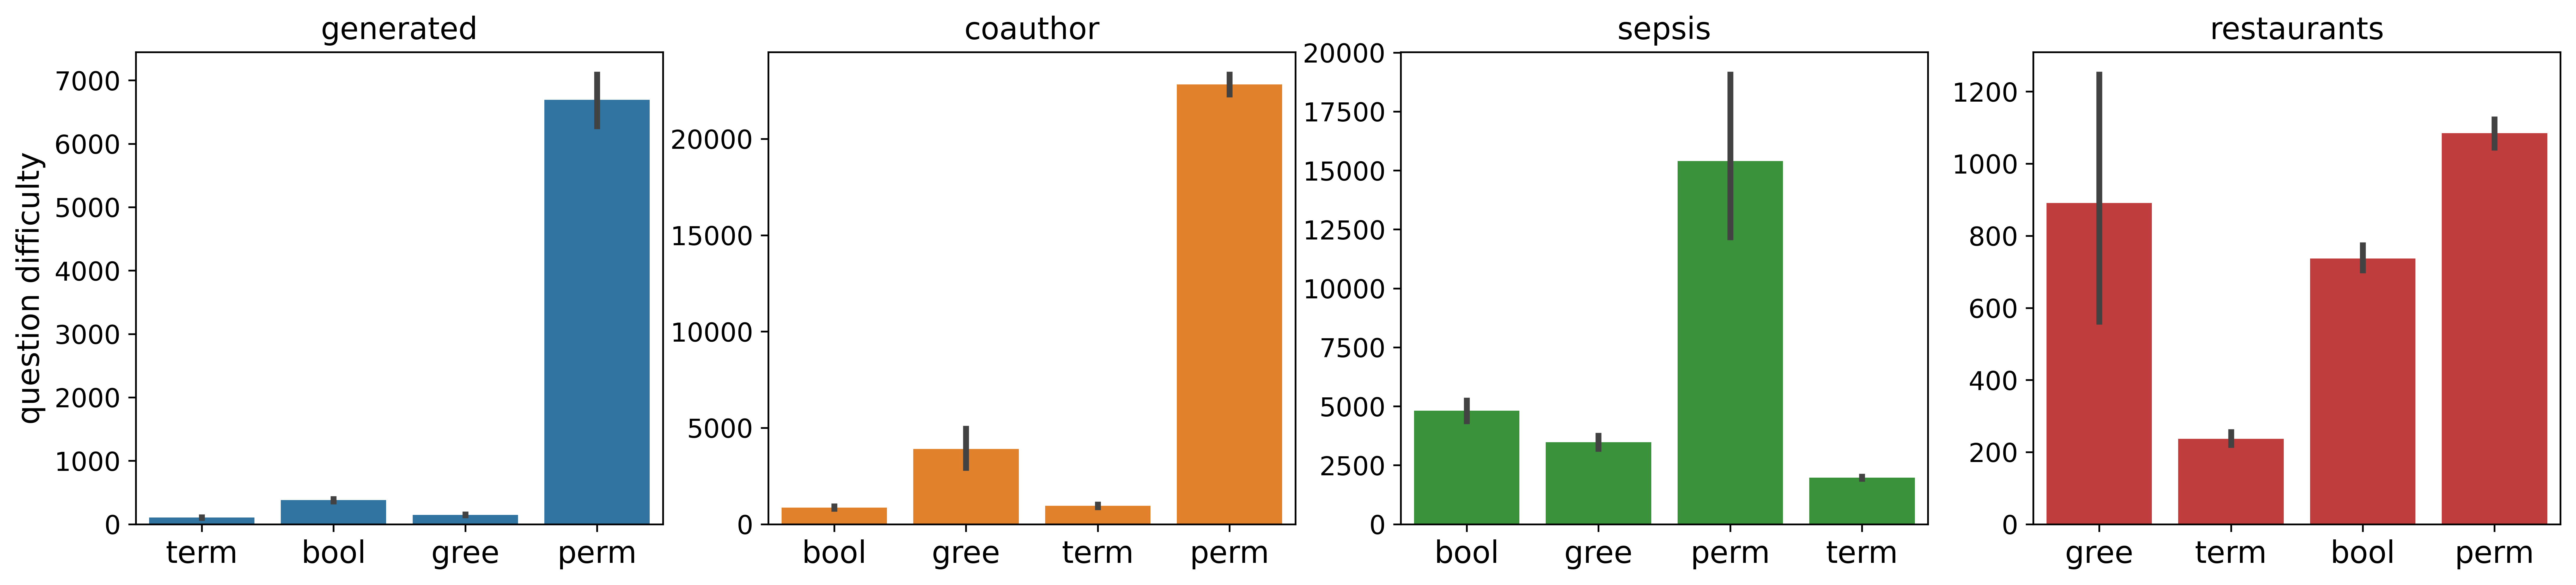

In [63]:
f, axs = plt.subplots(1,4,figsize = (20, 4), dpi=600)

for i,d in enumerate(df_12["dataset"].unique()):
    
    sns.barplot(data=df_12.query("dataset == '" + d + "'"),
                    x="framework", y="qd", color=sns.color_palette("tab10")[i],
                    ax=axs[i])
    
    axs[i].set_title(d)
    axs[i].set(xlabel=None, ylabel=None)

axs[0].set_ylabel("question difficulty")

# Bottom